In [120]:
import numpy  as  np 
import pandas as  pd 
import graphviz 

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  classification_report
from   sklearn.model_selection  import  train_test_split

In [121]:
dataset = pd.read_csv('tennis.csv') 
df = pd.DataFrame(dataset) 
df

,Wind,Temp,Outlook,Humidity,Action
0,weak,Hot,sunny,high,play
1,strong,Hot,sunny,high,play
2,weak,Hot,rainy,high,stay
3,weak,Mild,overcast,high,play
4,strong,Cold,rainy,normal,stay
5,weak,Cold,overcast,normal,play
6,strong,Cold,rainy,normal,stay
7,weak,Mild,sunny,normal,play
8,weak,Cold,sunny,normal,play
9,strong,Mild,overcast,normal,play


In [122]:
df['Wind']     = df['Wind'].map({'weak':0, 'strong':1})
df['Temp']     = df['Temp'].map({'Cold':0, 'Mild':1, 'Hot':2})
df['Outlook']  = df['Outlook'].map({'overcast':0, 'rainy':1, 'sunny':2})
df['Humidity'] = df['Humidity'].map({'normal':0, 'high':1})

df

,Wind,Temp,Outlook,Humidity,Action
0,0,2,2,1,play
1,1,2,2,1,play
2,0,2,1,1,stay
3,0,1,0,1,play
4,1,0,1,0,stay
5,0,0,0,0,play
6,1,0,1,0,stay
7,0,1,2,0,play
8,0,0,2,0,play
9,1,1,0,0,play


In [123]:
X = df.drop(['Action'], axis=1)  
y = df['Action'] 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

In [112]:
X_test

,Wind,Temp,Outlook,Humidity
3,0,1,0,1
6,1,0,1,0
1,1,2,2,1
2,0,2,1,1
10,0,1,2,1


In [124]:
clf = DecisionTreeClassifier()     # criterion='gini',max_depth=3,random_state=0

In [125]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [126]:
y_pred = clf.predict(X_test)
y_pred

array(['play', 'stay', 'stay', 'play', 'play'], dtype=object)

In [127]:
y_test == y_pred

3      True
6      True
1     False
2     False
10    False
Name: Action, dtype: bool

In [128]:
confusion_matrix(y_test, y_pred)

array([[1, 1],
       [2, 1]])

In [129]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

        play       0.33      0.50      0.40         2
        stay       0.50      0.33      0.40         3

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



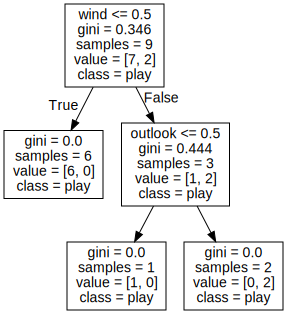

In [130]:
d = tree.export_graphviz(clf, class_names=y, feature_names=['wind',	'temp',	'outlook','humidity']);   # , filled=True, rounded=True, special_characters=True
graphviz.Source(d)  